
* References Used to Complete the Assignment
    * a. https://seaborn.pydata.org/tutorial.html
    * b. https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/#:~:text=Prerequisite%3A%20Linear%20Regression%20Linear%20Regression,value%20based%20on%20independent%20variables.
    * c. https://github.com/gagan-iitb/CS550/blob/main/Handouts/04_training_linear_models_CS550_ipynb_updated.ipynb

...


# Part 1: NY Taxi Fare Prediction

In [1]:
 !pip install -q kaggle

In [2]:
# from google.colab import files
# files.upload()

In [3]:
 !mkdir ~/.kaggle
 !cp kaggle.json ~/.kaggle/
 !chmod 600 ~/.kaggle/kaggle.json

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
 !kaggle competitions download -c new-york-city-taxi-fare-prediction

In [6]:
 !unzip new-york-city-taxi-fare-prediction

In [7]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [8]:
train = pd.read_csv("/content/drive/MyDrive/Academics/CS550/train_NYTaxi.csv", nrows = 1000000)
test = pd.read_csv("/content/drive/MyDrive/Academics/CS550/test_NYTaxi.csv")

PART 1 --> DATA CLEANSING 

Will perform the following activities
1.   Shape of train and test sets
2.   Check for NaNs and drop them (if any)
3.   Check for outliers and drop them (if any)
4.   Type conversion of relevant fields





In [9]:
train.head(15)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2
1,1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08 UTC,-73.966597,40.794345,-73.965682,40.803808,2
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1
3,3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5
5,5,2009-10-07 08:40:00.00000096,21.3,2009-10-07 08:40:00 UTC,-73.958883,40.780737,-73.995530,40.723353,1
6,6,2011-06-21 20:19:00.000000216,8.1,2011-06-21 20:19:00 UTC,-73.987642,40.732658,-74.004502,40.707470,6
7,7,2014-07-15 16:31:00.00000060,12.0,2014-07-15 16:31:00 UTC,-73.996637,40.725452,-73.978787,40.750765,1
8,8,2010-12-07 13:47:39.0000001,11.3,2010-12-07 13:47:39 UTC,-73.968040,40.759881,-73.979779,40.755003,2
9,9,2012-09-20 13:14:00.000000169,5.0,2012-09-20 13:14:00 UTC,-73.981982,40.752235,-73.983348,40.752432,1


In [10]:
# Check no of rows & columns in the dataset
print("Shape of the Training data :", train.shape)

# See all the columns in the dataset
print("All columns are :", list(train.columns))

Shape of the Training data : (100000, 9)
All columns are : ['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [11]:
# Check datatypes & count of not-null values in each field
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         100000 non-null  int64  
 1   key                100000 non-null  object 
 2   fare_amount        100000 non-null  float64
 3   pickup_datetime    100000 non-null  object 
 4   pickup_longitude   100000 non-null  float64
 5   pickup_latitude    100000 non-null  float64
 6   dropoff_longitude  100000 non-null  float64
 7   dropoff_latitude   100000 non-null  float64
 8   passenger_count    100000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 6.9+ MB


In [12]:
#check for missing values in train data
trainNull = train.isnull();
trainNull

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [13]:
trainNull.sum()


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [14]:
#check for missing values in test data
testNull = test.isnull();
testNull

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
9909,False,False,False,False,False,False,False
9910,False,False,False,False,False,False,False
9911,False,False,False,False,False,False,False
9912,False,False,False,False,False,False,False


In [15]:
testNull.sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [16]:
####drop the missing values

#We can See there are 0 null values in given train and test data.


In [17]:
#check the target column
train['fare_amount'].describe()


count    100000.000000
mean         11.333564
std           9.810826
min          -9.300000
25%           6.000000
50%           8.500000
75%          12.500000
max         394.000000
Name: fare_amount, dtype: float64

Here, min is -9 so we have to eliminate the non positive values now.

In [18]:
Counter(train['fare_amount']<0)

Counter({False: 99997, True: 3})

In [19]:
Counter(train['fare_amount']==0) #Lets remove them if distance is not 0, we will come back to it.

Counter({False: 99997, True: 3})

There are 3 Non-Positive Values to drop

Text(0, 0.5, 'Frequency')

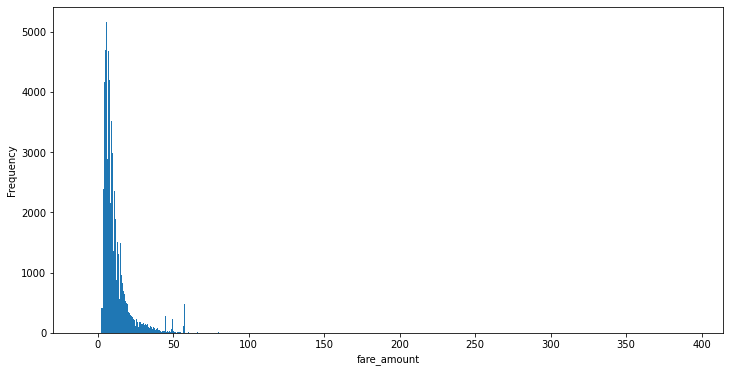

In [20]:
#Look for no. of non-positive fare_amount values.

plt.figure(figsize=(12,6))
plt.hist(train['fare_amount'], bins=1000)
plt.xlabel('fare_amount')
plt.ylabel('Frequency')

In [21]:
# Remove the non-positive fare_amount values.
train = train.drop(train[train['fare_amount']<0].index, axis=0)
train['fare_amount'].describe()

count    99997.000000
mean        11.334091
std          9.810489
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        394.000000
Name: fare_amount, dtype: float64

In [22]:
train = train.drop(train[train['fare_amount']==0].index, axis=0)
train['fare_amount'].describe()

count    99994.000000
mean        11.334431
std          9.810440
min          0.010000
25%          6.000000
50%          8.500000
75%         12.500000
max        394.000000
Name: fare_amount, dtype: float64

In [23]:
#Remove outliers
train['passenger_count'].describe()

count    99994.000000
mean         1.682151
std          1.308636
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [24]:
Counter(train['passenger_count']==0)

Counter({False: 99625, True: 369})

In [25]:
train = train.drop(train[train['passenger_count']==0].index, axis=0)
train['passenger_count'].describe()
Counter(train['passenger_count']==0)

Counter({False: 99625})

**Next let us explore the pickup latitude and longitudes**, 

Googling gave me this info
*   Latitudes range from -90 to 90.
*   Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them


In [26]:
train['pickup_latitude'].describe()

count    99625.000000
mean        39.886106
std          6.389358
min        -74.015935
25%         40.734777
50%         40.752459
75%         40.767025
max        404.666667
Name: pickup_latitude, dtype: float64

In [27]:
Counter(train['pickup_latitude']>90)

Counter({False: 99624, True: 1})

In [28]:
train = train.drop(train[train['pickup_latitude']>90].index, axis=0)
Counter(train['pickup_latitude']>90)

Counter({False: 99624})

In [29]:
train['pickup_longitude'].describe()

count    99624.000000
mean       -72.446755
std         10.877734
min       -736.516667
25%        -73.992133
50%        -73.981851
75%        -73.967172
max         40.801777
Name: pickup_longitude, dtype: float64

Check the data types of each column

In [30]:
Counter(train['pickup_longitude']<-180)

Counter({False: 99623, True: 1})

In [31]:
train = train.drop(train[train['pickup_longitude']<-180].index, axis=0)
train['pickup_longitude'].describe()


count    99623.000000
mean       -72.440089
std         10.672376
min       -121.391202
25%        -73.992132
50%        -73.981850
75%        -73.967172
max         40.801777
Name: pickup_longitude, dtype: float64

The Geography of New York

Longitude: 71° 47' 25" W to 79° 45' 54" W 

Latitude: 40° 29' 40" N to 45° 0' 42" N

So Lets remove the latitude and longitudes out of this range

In [32]:
Counter(train['pickup_latitude']<40)

Counter({False: 97596, True: 2027})

In [33]:
Counter(train['pickup_latitude']>45)

Counter({False: 99623})

In [34]:
Counter(train['pickup_longitude']>-71)

Counter({False: 97585, True: 2038})

In [35]:
Counter(train['pickup_longitude']<-80)

Counter({False: 99622, True: 1})

In [36]:
train = train.drop(train[train['pickup_latitude']<40].index, axis=0)
train = train.drop(train[train['pickup_latitude']>45].index, axis=0)
train = train.drop(train[train['pickup_longitude']>-71].index, axis=0)
train = train.drop(train[train['pickup_longitude']<-80].index, axis=0)

train = train.drop(train[train['dropoff_latitude']<40].index, axis=0)
train = train.drop(train[train['dropoff_latitude']>45].index, axis=0)
train = train.drop(train[train['dropoff_longitude']>-71].index, axis=0)
train = train.drop(train[train['dropoff_longitude']<-80].index, axis=0)

train.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,97483.000000,97483.000000,97483.000000,97483.000000,97483.000000,97483.000000,97483.000000
mean,50015.357929,11.328341,-73.975222,40.751043,-73.974472,40.751499,1.687351
std,28865.781276,9.748911,0.042475,0.031648,0.040518,0.037754,1.305373
min,0.000000,0.010000,-75.656882,40.152382,-75.677442,40.146368,1.000000
25%,25039.500000,6.000000,-73.992357,40.736376,-73.991651,40.735610,1.000000
50%,50040.000000,8.500000,-73.982137,40.753196,-73.980688,40.753837,1.000000
75%,75016.500000,12.500000,-73.968445,40.767477,-73.965484,40.768383,2.000000
max,99999.000000,394.000000,-71.061530,42.603366,-71.076242,44.640672,6.000000


In [37]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [38]:
test = test.drop(test[test['pickup_latitude']<40].index, axis=0)
test = test.drop(test[test['pickup_latitude']>45].index, axis=0)
test = test.drop(test[test['pickup_longitude']>-71].index, axis=0)
test = test.drop(test[test['pickup_longitude']<-80].index, axis=0)

test = test.drop(test[test['dropoff_latitude']<40].index, axis=0)
test = test.drop(test[test['dropoff_latitude']>45].index, axis=0)
test = test.drop(test[test['dropoff_longitude']>-71].index, axis=0)
test = test.drop(test[test['dropoff_longitude']<-80].index, axis=0)
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [39]:
train.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97483 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         97483 non-null  int64  
 1   key                97483 non-null  object 
 2   fare_amount        97483 non-null  float64
 3   pickup_datetime    97483 non-null  object 
 4   pickup_longitude   97483 non-null  float64
 5   pickup_latitude    97483 non-null  float64
 6   dropoff_longitude  97483 non-null  float64
 7   dropoff_latitude   97483 non-null  float64
 8   passenger_count    97483 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 9.5+ MB


key and pickup_datetime seem to be datetime columns which are in object format. Let's convert them to datetime

In [41]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [42]:
#Convert for test data
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [43]:
#check the dtypes after conversion
train.dtypes

Unnamed: 0                         int64
key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [44]:
test.dtypes

key                       datetime64[ns]
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [45]:
train.describe()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,97483.000000,97483.000000,97483.000000,97483.000000,97483.000000,97483.000000,97483.000000
mean,50015.357929,11.328341,-73.975222,40.751043,-73.974472,40.751499,1.687351
std,28865.781276,9.748911,0.042475,0.031648,0.040518,0.037754,1.305373
min,0.000000,0.010000,-75.656882,40.152382,-75.677442,40.146368,1.000000
25%,25039.500000,6.000000,-73.992357,40.736376,-73.991651,40.735610,1.000000
50%,50040.000000,8.500000,-73.982137,40.753196,-73.980688,40.753837,1.000000
75%,75016.500000,12.500000,-73.968445,40.767477,-73.965484,40.768383,2.000000
max,99999.000000,394.000000,-71.061530,42.603366,-71.076242,44.640672,6.000000


Now, for **EDA**. The following are my considerations - 
1. Does the number of passengers affect the fare? 
2. Does the date and time of pickup affect the fare?
3. Does the day of the week affect the fare?
4. Does the distance travelled affect the fare?

First, let's split the datetime field 'pickup_datetime' to the following - 
* year
* month
* date
* hour
* day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare.
Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*

Is this distance equal to the road travel distance? Do we have to do something else?


In [46]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [47]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

Now that we have calculated the distance, we shall create columns for the following -


*   year
*   month
*   date
*   hour
*   day of week






In [48]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [49]:
train.head(15)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,0,2009-04-08 19:11:10.000000400,4.9,2009-04-08 19:11:10+00:00,-73.998287,40.727490,-73.989854,40.735239,2,1.116850,2009,4,8,2,19
1,1,2012-07-30 16:19:08.000000300,4.9,2012-07-30 16:19:08+00:00,-73.966597,40.794345,-73.965682,40.803808,2,1.055053,2012,7,30,0,16
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00+00:00,-73.971638,40.763382,-73.953767,40.783715,1,2.715959,2011,2,22,1,13
3,3,2010-10-07 21:09:35.000000200,14.1,2010-10-07 21:09:35+00:00,-74.003545,40.707399,-73.981312,40.750071,1,5.101370,2010,10,7,3,21
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00+00:00,-74.004532,40.707465,-73.977908,40.745633,5,4.800593,2009,10,2,4,22
5,5,2009-10-07 08:40:00.000000960,21.3,2009-10-07 08:40:00+00:00,-73.958883,40.780737,-73.995530,40.723353,1,7.088301,2009,10,7,2,8
6,6,2011-06-21 20:19:00.000000216,8.1,2011-06-21 20:19:00+00:00,-73.987642,40.732658,-74.004502,40.707470,6,3.140583,2011,6,21,1,20
7,7,2014-07-15 16:31:00.000000600,12.0,2014-07-15 16:31:00+00:00,-73.996637,40.725452,-73.978787,40.750765,1,3.191260,2014,7,15,1,16
8,8,2010-12-07 13:47:39.000000100,11.3,2010-12-07 13:47:39+00:00,-73.968040,40.759881,-73.979779,40.755003,2,1.127758,2010,12,7,1,13
9,9,2012-09-20 13:14:00.000000169,5.0,2012-09-20 13:14:00+00:00,-73.981982,40.752235,-73.983348,40.752432,1,0.117131,2012,9,20,3,13


In [50]:
test.head(15)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,1,27,1,13
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21
5,2012-12-01 21:12:12.000000500,2012-12-01 21:12:12+00:00,-73.960983,40.765547,-73.979177,40.740053,1,3.222549,2012,12,1,5,21
6,2011-10-06 12:10:20.000000100,2011-10-06 12:10:20+00:00,-73.949013,40.773204,-73.959622,40.770893,1,0.929601,2011,10,6,3,12
7,2011-10-06 12:10:20.000000300,2011-10-06 12:10:20+00:00,-73.777282,40.646636,-73.985083,40.759368,1,21.540102,2011,10,6,3,12
8,2011-10-06 12:10:20.000000200,2011-10-06 12:10:20+00:00,-74.014099,40.709638,-73.995106,40.741365,1,3.873962,2011,10,6,3,12
9,2014-02-18 15:22:20.000000200,2014-02-18 15:22:20+00:00,-73.969582,40.765519,-73.980686,40.770725,1,1.099794,2014,2,18,1,15


In [51]:
train.shape

(97483, 15)

In [52]:
train.dtypes

Unnamed: 0                         int64
key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
H_Distance                       float64
Year                               int64
Month                              int64
Date                               int64
Day of Week                        int64
Hour                               int64
dtype: object

In [53]:
train['H_Distance'].describe()

count    97483.000000
mean         3.344207
std          4.226953
min          0.000000
25%          1.257784
50%          2.150063
75%          3.926887
max        436.305506
Name: H_Distance, dtype: float64

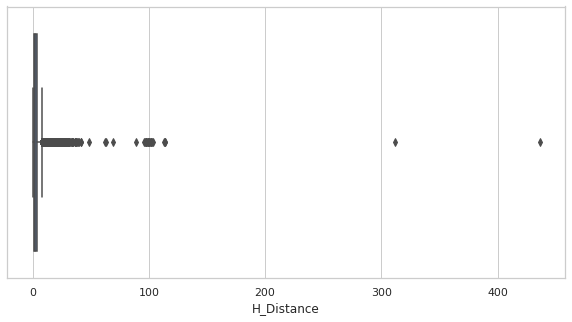

In [54]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))
#trainSet = sns.load_dataset("train")
ax = sns.boxplot(x=train["H_Distance"])

We can see most of them lies below 100, rest all maybe outliers.

Its impossible to travel such long distances, lets remove them.

In [55]:
Counter( train['H_Distance']>100)

Counter({False: 97472, True: 11})

In [56]:
Counter( train['H_Distance']>200)

Counter({False: 97481, True: 2})

In [57]:
train = train.drop(train[train['H_Distance']>100].index, axis=0)
test = test.drop(test[test['H_Distance']>100].index, axis=0)

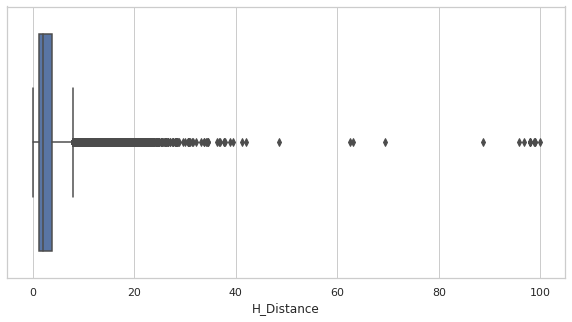

In [58]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))
#trainSet = sns.load_dataset("train")
ax = sns.boxplot(x=train["H_Distance"])

Now we can see there is no distance above 100

In [59]:
Counter(train[ train['H_Distance']==0])

train = train.drop(train[train['H_Distance']==0].index, axis=0)
train.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
count,96476.000000,96476.000000,96476.000000,96476.000000,96476.000000,96476.000000,96476.000000,96476.000000,96476.000000,96476.000000,96476.000000,96476.000000,96476.000000
mean,50019.958508,11.327747,-73.975506,40.750884,-73.974773,40.751288,1.687497,3.361484,2011.741884,6.268647,15.683838,3.029665,13.513278
std,28868.546357,9.631663,0.037590,0.028467,0.036359,0.031774,1.305445,3.744908,1.866357,3.435976,8.690483,1.950555,6.513688
min,0.000000,0.010000,-75.656882,40.152382,-75.677442,40.146368,1.000000,0.000084,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,25033.750000,6.000000,-73.992363,40.736405,-73.991649,40.735618,1.000000,1.280016,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,50053.500000,8.500000,-73.982157,40.753204,-73.980711,40.753847,1.000000,2.173205,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,75028.250000,12.500000,-73.968580,40.767477,-73.965663,40.768388,2.000000,3.954069,2013.000000,9.000000,23.000000,5.000000,19.000000
max,99999.000000,394.000000,-71.061530,42.364088,-71.076242,42.367063,6.000000,99.900338,2015.000000,12.000000,31.000000,6.000000,23.000000


In [60]:
Counter(test[ test['H_Distance']==0])

test = test.drop(test[test['H_Distance']==0].index, axis=0)
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
count,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000
mean,-73.975177,40.750779,-73.974102,40.751487,1.670668,3.465079,2011.821243,6.855123,16.192899,2.852986,13.465358
std,0.039231,0.031166,0.035135,0.033218,1.278280,3.976591,1.804748,3.353627,8.837636,1.994563,6.874533
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,0.001486,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,-73.992569,40.736084,-73.991275,40.735196,1.000000,1.320656,2010.000000,4.000000,9.000000,1.000000,8.000000
50%,-73.982365,40.753045,-73.980083,40.754056,1.000000,2.235472,2012.000000,7.000000,16.000000,3.000000,15.000000
75%,-73.968173,40.767043,-73.964295,40.768748,2.000000,4.064570,2014.000000,10.000000,25.000000,5.000000,19.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,99.996040,2015.000000,12.000000,31.000000,6.000000,23.000000


**1. Does the number of passengers affect the fare?**

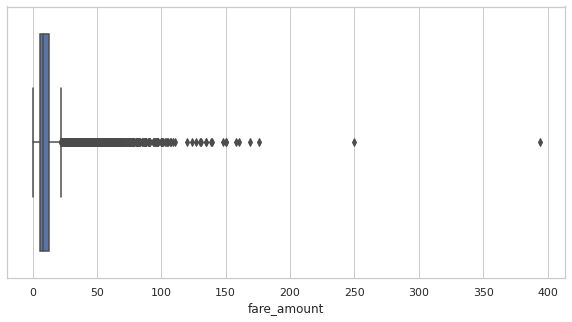

In [61]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))
#trainSet = sns.load_dataset("train")
ax = sns.boxplot(x=train["fare_amount"])

We cant ignore the fare amounts laying outside the limits of box plot.

Following plot is just for testing, we cant conclude anything from this violin plot.

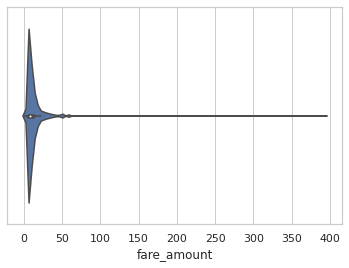

In [62]:
sns.set_theme(style="whitegrid")
# train = sns.load_dataset("train")
ax = sns.violinplot(x=train["fare_amount"])

Text(0, 0.5, 'Fare')

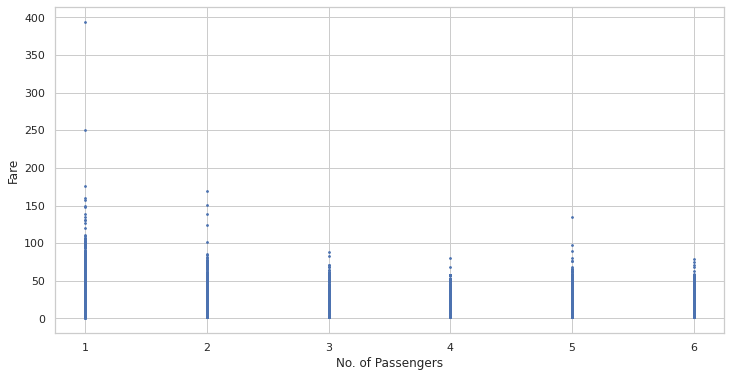

In [63]:

plt.figure(figsize=(12,6))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=3)

plt.xlabel('No. of Passengers')
plt.ylabel('Fare')


Text(0, 0.5, 'Frequency')

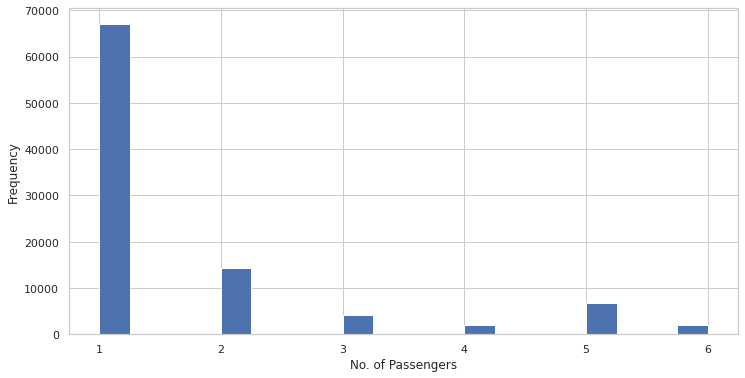

In [64]:
plt.figure(figsize=(12,6))
plt.hist(train['passenger_count'], bins=20)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

From the above graphs we can see fare amount looks almost equal, but for the number of passangers 3, 4, 5, 6 we expected less fare amount, because the frequency is also less, but as its more there can be some relation between no. of passangers and fare amount. As distance also matter, we cant clearly conclude in the current situation.

In [65]:
#Assuming Example H_distance - (1.9 to 2.1) lets see how much fare was collected per number of person:

**2. Does the date and time of pickup affect the fare?**

Text(0, 0.5, 'fare_amount')

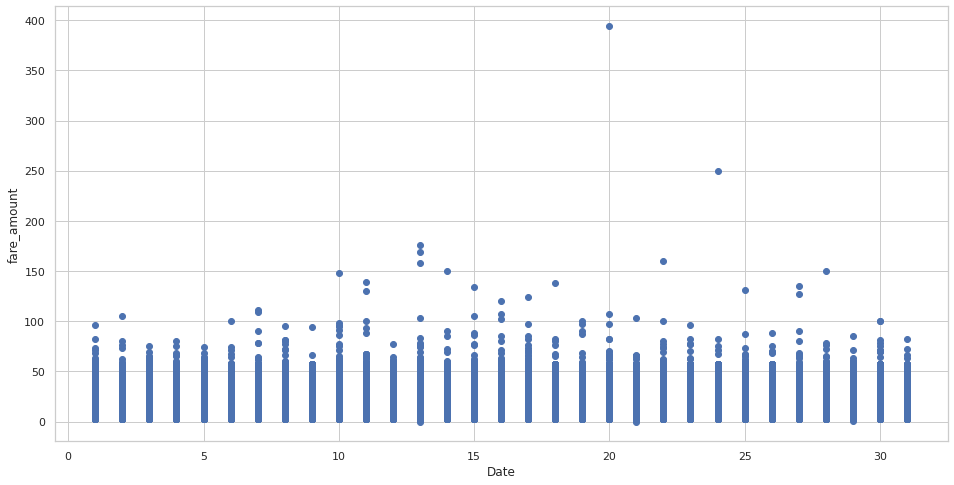

In [66]:
plt.figure(figsize=(16,8))
plt.scatter(x=train['Date'], y=train['fare_amount'])
plt.xlabel('Date')
plt.ylabel('fare_amount')

On Each date the fare amount seem to be equal, and have no influence.

Text(0, 0.5, 'Frequency')

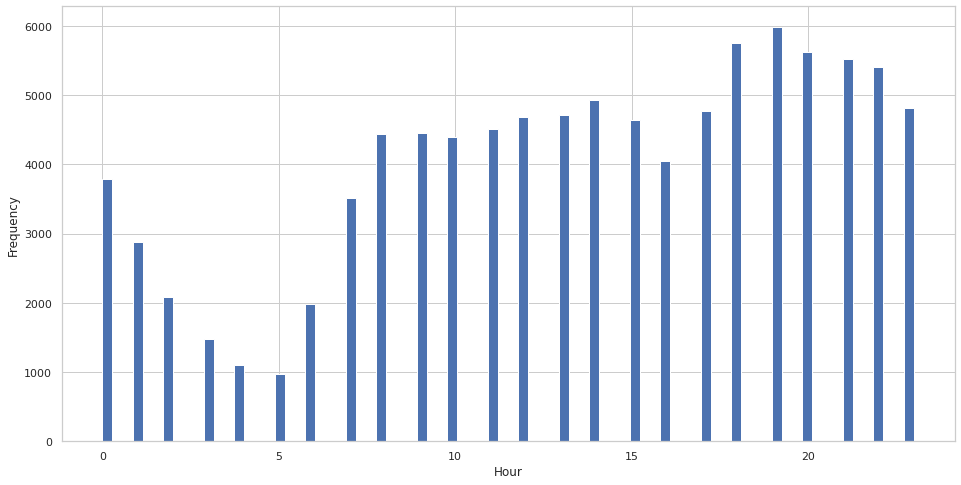

In [67]:
plt.figure(figsize=(16,8))
plt.hist(train['Hour'], bins = 80)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

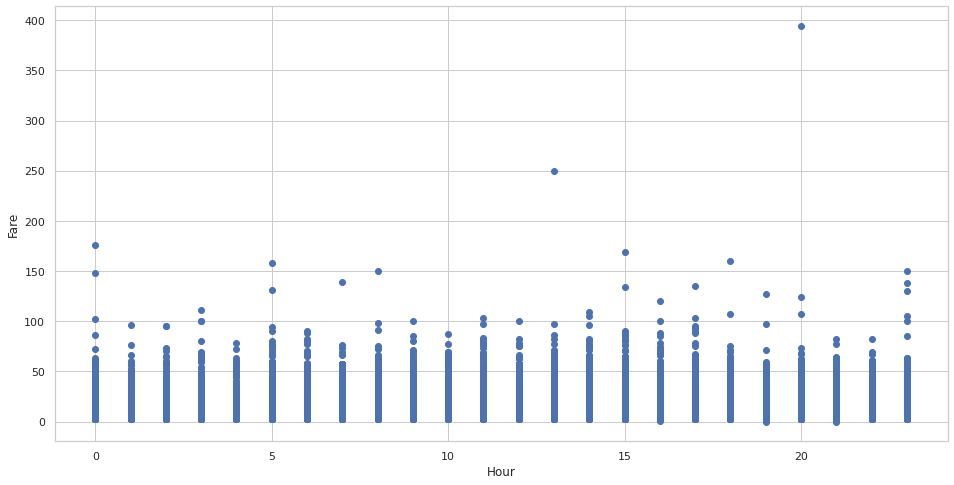

In [68]:
plt.figure(figsize=(16,8))
plt.scatter(x=train['Hour'], y=train['fare_amount'])
plt.xlabel('Hour')
plt.ylabel('Fare')

Lowest demand is in the night(2-5) AM, then it rises significantly, We can see highest demand in the evening time from 6-8 PM.

But then also, we can see fares are almost equal in every hour of the day.

**3. Does the day of the week affect the fare?**

Text(0, 0.5, 'Fare')

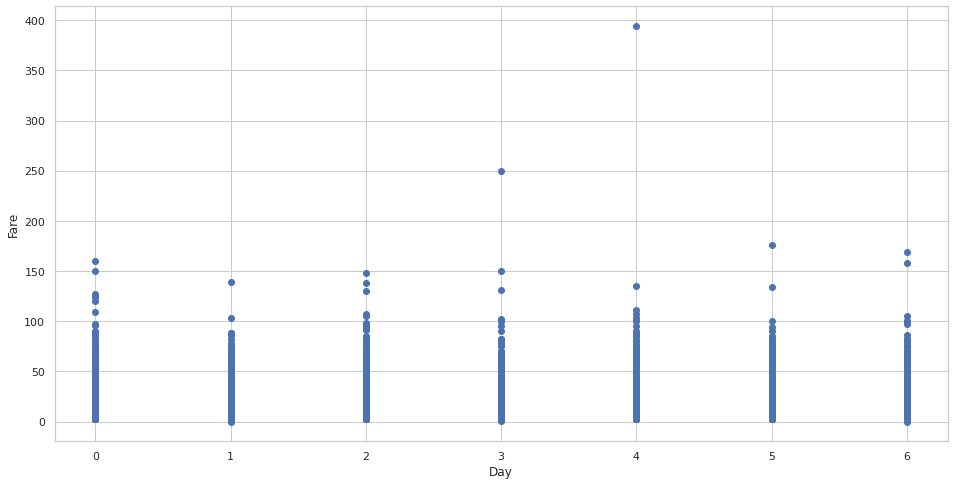

In [69]:
plt.figure(figsize=(16,8))
plt.scatter(x=train['Day of Week'], y=train['fare_amount'])
plt.xlabel('Day')
plt.ylabel('Fare')

In [70]:
print( train[train['fare_amount']>300])

       Unnamed: 0                           key  fare_amount  \
81847       81847 2013-12-20 20:37:50.000000300        394.0   

                pickup_datetime  pickup_longitude  pickup_latitude  \
81847 2013-12-20 20:37:50+00:00        -73.789658        40.646153   

       dropoff_longitude  dropoff_latitude  passenger_count  H_Distance  Year  \
81847         -73.978542         41.524688                1   98.962922  2013   

       Month  Date  Day of Week  Hour  
81847     12    20            4    20  


For distance of 98.9 fare of 394 was taken 

Text(0, 0.5, 'Frequency')

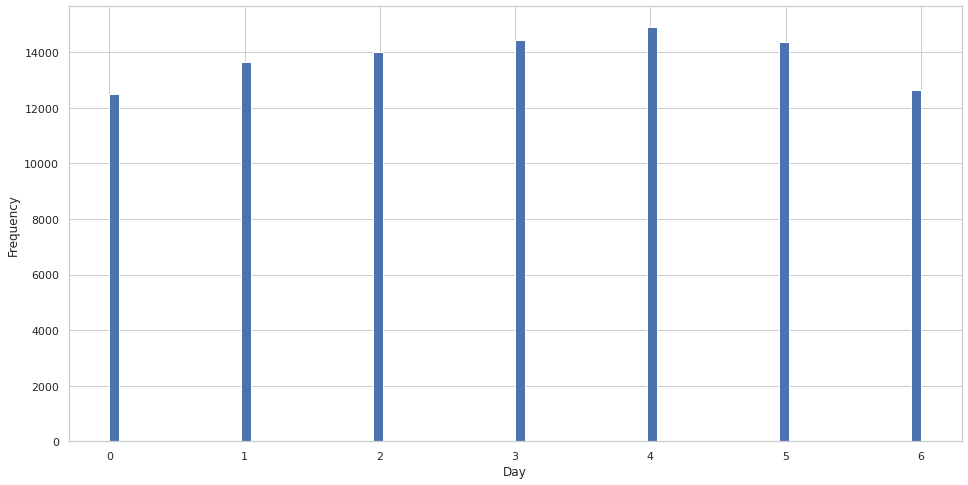

In [71]:
plt.figure(figsize=(16,8))
plt.hist(train['Day of Week'], bins=80)
plt.xlabel('Day')
plt.ylabel('Frequency')

**4. Does the distance affect the fare?**

In [72]:
DistRange0 = train.loc[(train['H_Distance'] == 0), ['H_Distance']]
DistRange1 = train.loc[(train['H_Distance'] > 0) & (train['H_Distance'] <= 5),['H_Distance']]
DistRange2 = train.loc[(train['H_Distance'] > 5) & (train['H_Distance'] <= 10),['H_Distance']]
DistRange3 = train.loc[(train['H_Distance'] > 10) & (train['H_Distance'] <= 15),['H_Distance']]
DistRange4 = train.loc[(train['H_Distance'] > 15) & (train['H_Distance'] <= 30),['H_Distance']]
DistRange5 = train.loc[(train['H_Distance'] > 30) & (train['H_Distance'] <= 60),['H_Distance']]
DistRange6 = train.loc[(train['H_Distance'] > 60),['H_Distance']]
DistRange0['DistRange'] = '0'
DistRange1['DistRange'] = '0-5'
DistRange2['DistRange'] = '5-10'
DistRange3['DistRange'] = '10-15'
DistRange4['DistRange'] = '15-30'
DistRange5['DistRange'] = '30-60'
DistRange6['DistRange'] = '>60'
DistRanges =pd.concat([DistRange0,DistRange1,DistRange2,DistRange3,DistRange4,DistRange5,DistRange6])

Text(0, 0.5, 'Frequency')

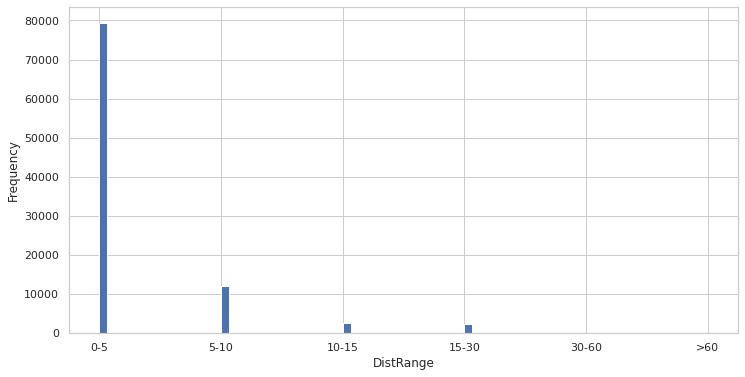

In [73]:
plt.figure(figsize=(12,6))
plt.hist(DistRanges['DistRange'], bins=75)
plt.xlabel('DistRange')
plt.ylabel('Frequency')

Maximum people travelled distance between 0-5

Text(0, 0.5, 'Fare')

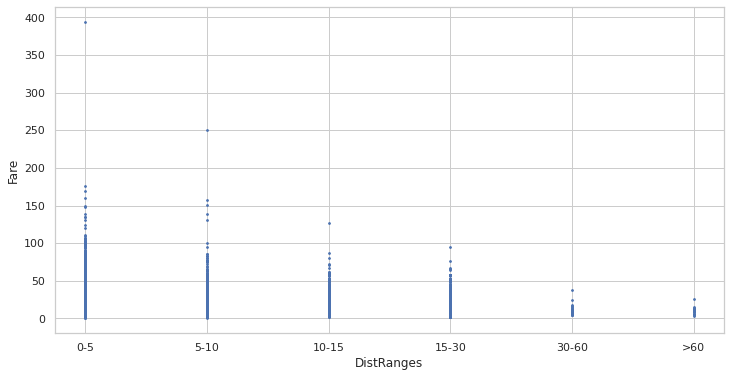

In [74]:
plt.figure(figsize=(12,6))
plt.scatter(x=DistRanges['DistRange'], y=train['fare_amount'], s=3)

plt.xlabel('DistRanges')
plt.ylabel('Fare')

We can clearly see for high distances, more fare is taken, So YES! Fare amount depends upon distance.

# Continue in a similar way for each of the parts

In [75]:
# y_train = train.fare_amount
# Xtrain = train.copy()
# Xtrain = Xtrain.drop(['fare_amount'], axis = 1)
# Xtrain = Xtrain.drop(['key'], axis = 1)
# Xtrain = Xtrain.drop(['pickup_datetime'], axis = 1)
# Xtrain = Xtrain.drop(['Unnamed: 0'], axis = 1)
# Xtrain = Xtrain.drop(['pickup_longitude'], axis = 1)
# Xtrain = Xtrain.drop(['pickup_latitude'], axis = 1)
# Xtrain = Xtrain.drop(['dropoff_longitude'], axis = 1)
# Xtrain = Xtrain.drop(['dropoff_latitude'], axis = 1)
# Xtrain = Xtrain.drop(['passenger_count'], axis = 1)
# X_test = test.copy()
# X_test = X_test.drop(['key'], axis = 1)
# X_test = X_test.drop(['pickup_datetime'], axis = 1)
# X_test = X_test.drop(['pickup_longitude'], axis = 1)
# X_test = X_test.drop(['pickup_latitude'], axis = 1)
# X_test = X_test.drop(['dropoff_longitude'], axis = 1)
# X_test = X_test.drop(['dropoff_latitude'], axis = 1)
# X_test = X_test.drop(['passenger_count'], axis = 1)

In [76]:
# Xtrain.dtypes

In [77]:
# Xtrain

In [78]:
# X_test

In [79]:
# from sklearn.linear_model import LinearRegression
# Xtest = train.H_Distance
# LR = LinearRegression()
# LR.fit(Xtrain, y_train)
# y_pred = LR.predict(Xtrain)
# LR.intercept_
# LR.score(Xtest, y_pred)

In [80]:
# plt.scatter(X_test, y_pred)

In [81]:
# plt.plot(X_test, y_pred)
# plt.figure(figsize=(16,8))
# plt.show()

In [82]:
y_train = train.fare_amount
X_train = train.copy()
X_train = X_train.drop(['fare_amount'], axis = 1)
X_train = X_train.drop(['Unnamed: 0'], axis = 1)
X_train = X_train.drop(['key'], axis = 1)
X_train = X_train.drop(['pickup_datetime'], axis = 1)

X_test = test.copy()
X_test = X_test.drop(['key'], axis = 1)
X_test = X_test.drop(['pickup_datetime'], axis = 1)

In [83]:
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,-73.998287,40.727490,-73.989854,40.735239,2,1.116850,2009,4,8,2,19
1,-73.966597,40.794345,-73.965682,40.803808,2,1.055053,2012,7,30,0,16
2,-73.971638,40.763382,-73.953767,40.783715,1,2.715959,2011,2,22,1,13
3,-74.003545,40.707399,-73.981312,40.750071,1,5.101370,2010,10,7,3,21
4,-74.004532,40.707465,-73.977908,40.745633,5,4.800593,2009,10,2,4,22
...,...,...,...,...,...,...,...,...,...,...,...
99995,-73.965111,40.772343,-73.952072,40.768021,1,1.198577,2015,6,8,0,7
99996,-73.786162,40.640710,-73.878865,40.658735,1,8.073564,2012,9,17,0,15
99997,-73.982023,40.758052,-73.993930,40.734462,1,2.808335,2013,2,2,5,19
99998,-73.956423,40.778140,-73.981008,40.779568,1,2.076158,2013,12,28,5,15


In [84]:
X_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,1,27,1,13
1,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21
...,...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,2.124874,2015,5,10,6,12
9910,-73.945511,40.803600,-73.960213,40.776371,6,3.270969,2015,1,12,0,17
9911,-73.991600,40.726608,-73.789742,40.647011,6,19.183941,2015,4,19,6,20
9912,-73.985573,40.735432,-73.939178,40.801731,6,8.343486,2015,1,31,5,1


In [85]:
X_train = X_train.drop(["pickup_longitude"],axis =1)
X_train = X_train.drop(["pickup_latitude"],axis =1)
X_train = X_train.drop(["dropoff_longitude"],axis =1)
X_train = X_train.drop(["dropoff_latitude"],axis =1)

Data Scaling:-

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [87]:
x_Scaled = scaler.transform(X_train)

In [88]:
x_Scaled

array([[ 0.23938523, -0.59938623, -1.46911744, ..., -0.88417155,
        -0.52788599,  0.84234162],
       [ 0.23938523, -0.61588799,  0.13830006, ...,  1.64734629,
        -1.55324042,  0.38177066],
       [-0.52664116, -0.17237518, -0.39750577, ...,  0.72679435,
        -1.0405632 , -0.0788003 ],
       ...,
       [-0.52664116, -0.14770794,  0.6741059 , ..., -1.57458551,
         1.01014565,  0.84234162],
       [-0.52664116, -0.34322153,  0.6741059 , ...,  1.4172083 ,
         1.01014565,  0.22824701],
       [-0.52664116, -0.14426059,  1.20991173, ...,  1.18707032,
         1.01014565,  0.84234162]])

**Pipeline**

In [89]:
from sklearn.base import BaseEstimator

class OutletTypeEncoder(BaseEstimator):
    def _init_(self):
        pass
  
    
    def haversine_distance(self, lat1, long1, lat2, long2, data ): 

        R = 6371  #radius of earth in kilometers
        i = data
        
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])

        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])

        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) * 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) * 2

        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

        #d = R*
        d = (R * c) #in kilometers
        i['H_Distance'] = d
        return d

    def fit(self, documents, y=None):
        return self


    def transform(self, x_dataset):
        self.haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', x_dataset) 


        x_dataset = x_dataset.loc[~(x_dataset == 0).any(axis=1)]
        x_dataset["non_pos"] = x_dataset.apply(lambda x: np.NaN if x.fare_amount <= 0 else 1, axis=1)
        x_dataset = x_dataset.dropna(how = 'any', axis = 0)

         
        # test = test.drop(test[test['pickup_latitude']<40].index, axis=0)
        # test = test.drop(test[test['pickup_latitude']>45].index, axis=0)
        # test = test.drop(test[test['pickup_longitude']>-71].index, axis=0)
        # test = test.drop(test[test['pickup_longitude']<-80].index, axis=0)
        TRAIN = x_dataset
        TRAIN = TRAIN[TRAIN.pickup_longitude > -71]
        TRAIN = TRAIN[TRAIN.dropoff_longitude > -71]
        TRAIN = TRAIN[TRAIN.pickup_longitude < -80]
        TRAIN = TRAIN[TRAIN.dropoff_longitude < -80]
        TRAIN = TRAIN[TRAIN.pickup_latitude > 45]
        TRAIN = TRAIN[TRAIN.dropoff_latitude > 45]
        TRAIN = TRAIN[TRAIN.pickup_latitude < 40]
        TRAIN = TRAIN[TRAIN.dropoff_latitude < 40]
        TRAIN = TRAIN.dropna(how = 'any', axis = 0)

        TRAIN['key'] = pd.to_datetime(TRAIN['key'])
        TRAIN['pickup_datetime']  = pd.to_datetime(TRAIN['pickup_datetime'])

        data = [TRAIN,test]
        
        test['key'] = pd.to_datetime(test['key'])
        test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])



        test = test[test.pickup_longitude > -71]
        test = test[test.dropoff_longitude > -71]
        test = test[test.pickup_longitude < -80]
        test = test[test.dropoff_longitude < -80]
        test = test[test.pickup_latitude > 45]
        test = test[test.dropoff_latitude > 45]
        test= test[test.pickup_latitude < 40]
        test = test[test.dropoff_latitude < 40]
        test = test.dropna(how = 'any', axis = 0)


        for i in data:
            i['Year'] = i['pickup_datetime'].dt.year
            i['Month'] = i['pickup_datetime'].dt.month
            i['Date'] = i['pickup_datetime'].dt.day
            i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
            i['Hour'] = i['pickup_datetime'].dt.hour

      
        return TRAIN

K-fold cross Validation:

We have 96476 rows, let k = 10,000
We will train 9 folds and test on 1 fold.

In [90]:
k = 10000
fold1 = X_train.loc[0:10000]                                            
fold2 = X_train.loc[10000:20000]
fold3 = X_train.loc[20000:30000]
fold4 = X_train.loc[30000:40000]
fold5 = X_train.loc[40000:50000]
fold6 = X_train.loc[50000:60000]
fold7 = X_train.loc[60000:70000]
fold8 = X_train.loc[70000:80000]
fold9 = X_train.loc[80000:90000]
fold10 = X_train.loc[90000:99999]



In [91]:

# # for i in Kfold:
#     testValue[i] = Kfold[i]
#     if i == 0:
#         trainValue[i] = pd.concat([Kfold[1]:Kfold[10]])
ytrain1 = y_train.loc[0:10000]
ytrain2 = y_train.loc[10000:20000]
ytrain3 = y_train.loc[20000:30000]
ytrain4 = y_train.loc[30000:40000]
ytrain5 = y_train.loc[40000:50000]
ytrain6 = y_train.loc[50000:60000]
ytrain7 = y_train.loc[60000:70000]
ytrain8 = y_train.loc[70000:80000]
ytrain9 = y_train.loc[80000:90000]
ytrain10 = y_train.loc[90000:99999]


train1 = pd.concat([fold1, fold2, fold3, fold4, fold5, fold6, fold7, fold8, fold9])
train2 = pd.concat([fold1, fold2, fold3, fold4, fold5, fold6, fold7, fold8, fold10])
train3 = pd.concat([fold1, fold2, fold3, fold4, fold5, fold6, fold7, fold9, fold10])
train4 = pd.concat([fold1, fold2, fold3, fold4, fold5, fold6, fold8, fold9, fold10])
train5 = pd.concat([fold1, fold2, fold3, fold4, fold5, fold7, fold8, fold9, fold10])
train6 = pd.concat([fold1, fold2, fold3, fold4, fold6, fold7, fold8, fold9, fold10])
train7 = pd.concat([fold1, fold2, fold3, fold5, fold6, fold7, fold8, fold9, fold10])
train8 = pd.concat([fold1, fold2, fold4, fold5, fold6, fold7, fold8, fold9, fold10])
train9 = pd.concat([fold1, fold3, fold4, fold5, fold6, fold7, fold8, fold9, fold10])
train10 = pd.concat([fold2, fold3, fold4, fold5, fold6, fold7, fold8, fold9, fold10])

yTrain1 = pd.concat([ytrain1, ytrain2, ytrain3, ytrain4, ytrain5, ytrain6, ytrain7, ytrain8, ytrain9])
yTrain2 = pd.concat([ytrain1, ytrain2, ytrain3, ytrain4, ytrain5, ytrain6, ytrain7, ytrain8, ytrain10])
yTrain3 = pd.concat([ytrain1, ytrain2, ytrain3, ytrain4, ytrain5, ytrain6, ytrain7, ytrain9, ytrain10])
yTrain4 = pd.concat([ytrain1, ytrain2, ytrain3, ytrain4, ytrain5, ytrain6, ytrain8, ytrain9, ytrain10])
yTrain5 = pd.concat([ytrain1, ytrain2, ytrain3, ytrain4, ytrain5, ytrain7, ytrain8, ytrain9, ytrain10])
yTrain6 = pd.concat([ytrain1, ytrain2, ytrain3, ytrain4, ytrain6, ytrain7, ytrain8, ytrain9, ytrain10])
yTrain7 = pd.concat([ytrain1, ytrain2, ytrain3, ytrain5, ytrain6, ytrain7, ytrain8, ytrain9, ytrain10])
yTrain8 = pd.concat([ytrain1, ytrain2, ytrain4, ytrain5, ytrain6, ytrain7, ytrain8, ytrain9, ytrain10])
yTrain9 = pd.concat([ytrain1, ytrain3, ytrain4, ytrain5, ytrain6, ytrain7, ytrain8, ytrain9, ytrain10])
yTrain10 = pd.concat([ytrain2, ytrain3, ytrain4, ytrain5, ytrain6, ytrain7, ytrain8, ytrain9, ytrain10])

test1 = fold10
test2 = fold9
test3 = fold8
test4 = fold7
test5 = fold6
test6 = fold5
test7 = fold4
test8 = fold3
test9 = fold2
test10 = fold1

ytest1 = ytrain10
ytest2 = ytrain9
ytest3 = ytrain8
ytest4 = ytrain7
ytest5 = ytrain6
ytest6 = ytrain5
ytest7 = ytrain4
ytest8 = ytrain3
ytest9 = ytrain2
ytest10 = ytrain1

In [92]:
#train1

In [93]:
#train10

In [94]:
#test1

In [95]:
from sklearn.linear_model import LinearRegression
#Kfold = [fold1, fold2, fold3, fold4, fold5, fold6, fold7, fold8, fold9, fold10]
trainValue = [train1, train2, train3, train4, train5, train6, train7, train8, train9, train10]
testValue = [test1, test2, test3, test4, test5, test6, test7, test8, test9, test10]
ytrainValue = [yTrain1, yTrain2, yTrain3, yTrain4, yTrain5, yTrain6, yTrain7, yTrain8, yTrain9, yTrain10]
ytests = [ytest1, ytest2, ytest3, ytest4, ytest5, ytest6, ytest7, ytest8, ytest9, ytest10]
scores = []
ypreds = []
i = 0


while i<10:
  linear_reg = LinearRegression()
  linear_reg.fit(trainValue[i], ytrainValue[i])
  y_pred = linear_reg.predict(testValue[i])
  ypreds.append(y_pred)
  x = linear_reg.score(testValue[i], ytests[i])
  scores.append(x)
  i+=1



In [96]:
scores

[0.7132791403195895,
 0.7380313199124733,
 0.7244020228625032,
 0.7188655168724631,
 0.7587802837077369,
 0.7341857258403621,
 0.7604930177159688,
 0.5472400349282105,
 0.7583000990783555,
 0.7099608057224388]

Average Score:

In [97]:
sum = 0
for i in scores:
    sum += i

sum = sum/10
print("sum: ", sum)
print("Accuracy: ", sum*100,"%")

sum:  0.7163537966960102
Accuracy:  71.63537966960102 %


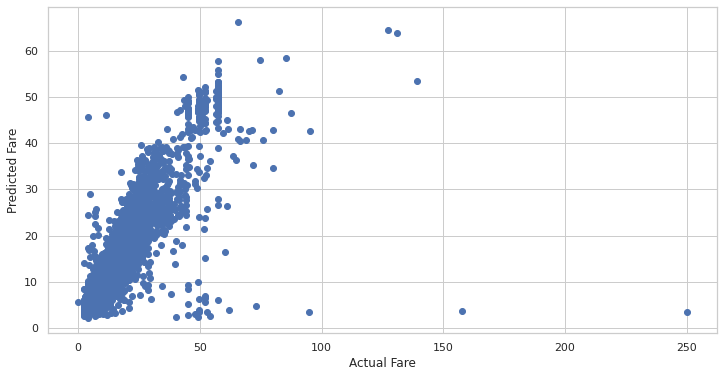

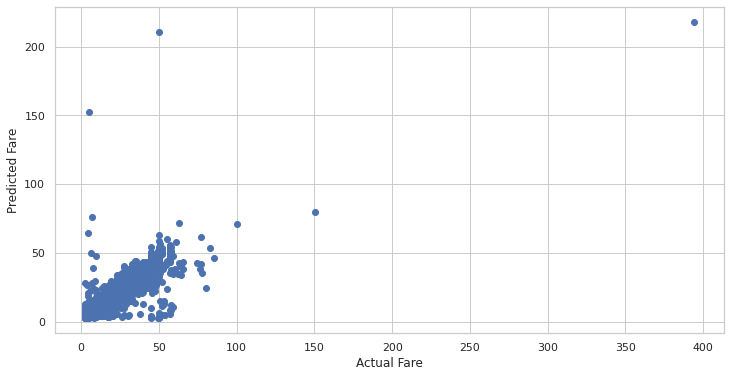

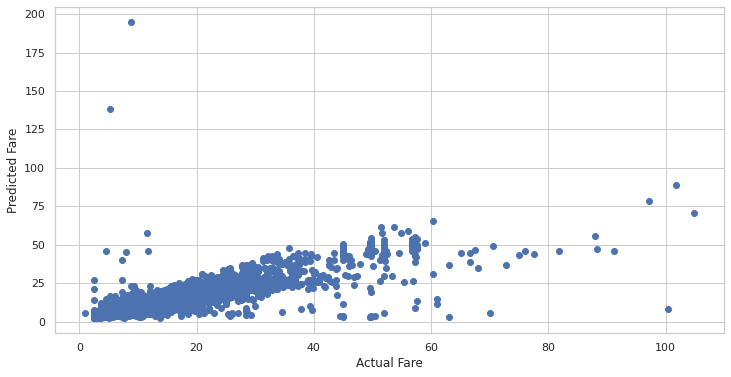

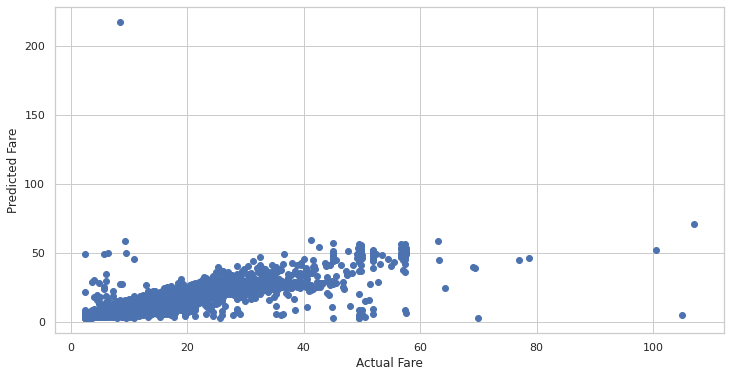

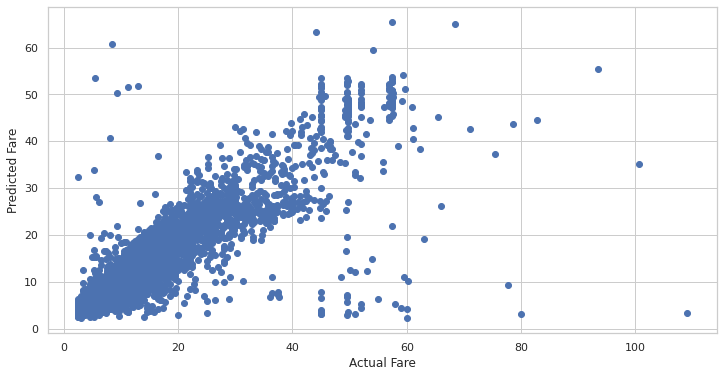

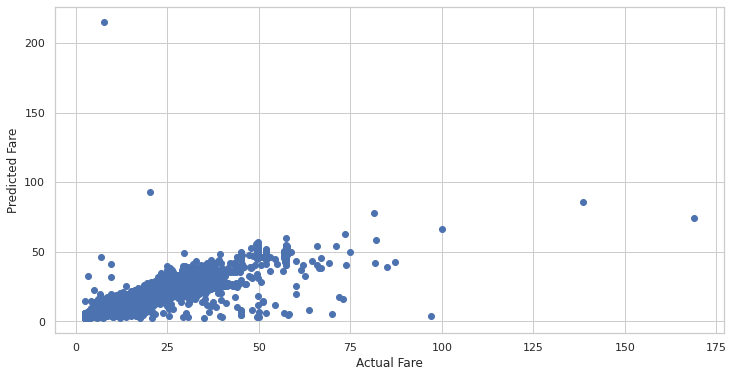

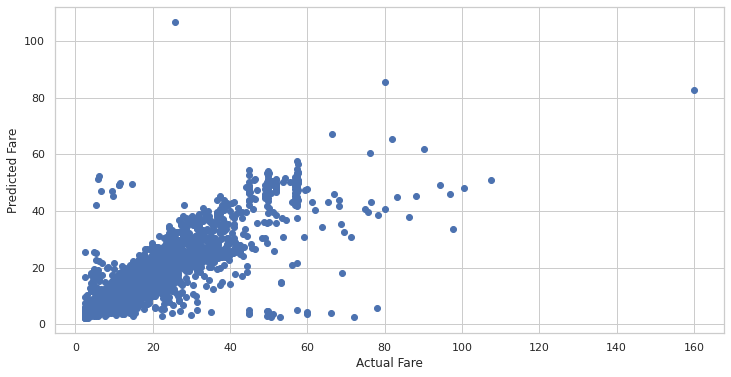

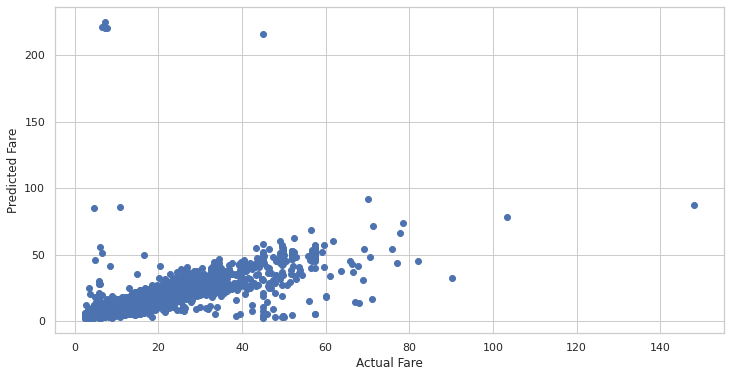

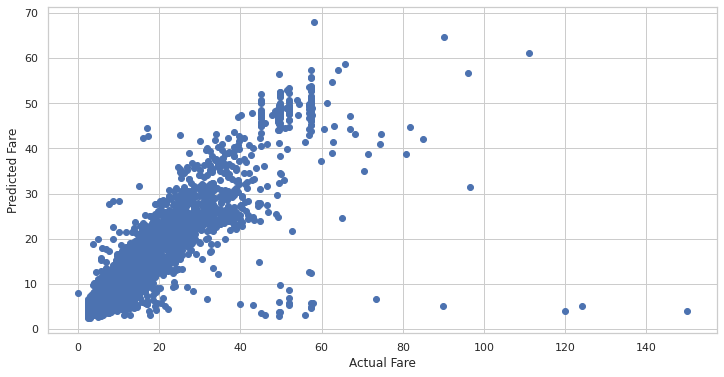

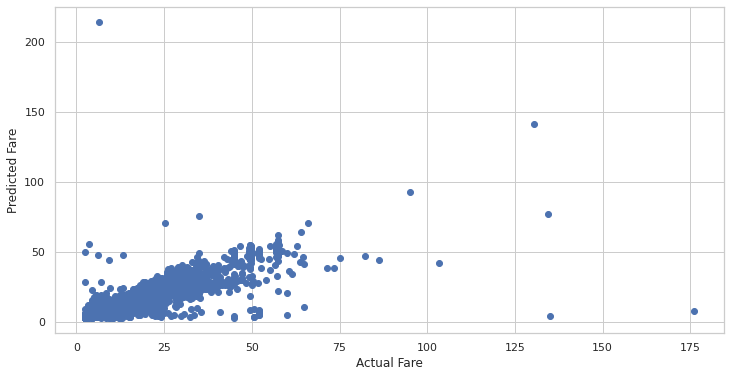

In [98]:
for i in range (10):
  plt.figure(figsize=(12,6))
  plt.scatter(ytests[i], ypreds[i])
  plt.xlabel('Actual Fare')
  plt.ylabel('Predicted Fare')
  plt.show()

We are getting almost the linear plots for all 10 set of predictions.

In [99]:
# train1.shape


In [100]:
# yTrain1.shape

In [101]:
# test1.shape

In [102]:
# test2.size

In [103]:
# y_pred.size


In [104]:
# X_test.shape

1) Matrix Based

In [105]:
x_Scaled.shape

(96476, 7)

In [106]:
lg = len(x_Scaled) #length
X_b = np.c_[np.ones((lg, 1)), x_Scaled]  # add x0 = 1 to each instance
print(X_b)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
print("theta:",theta_best)

[[ 1.          0.23938523 -0.59938623 ... -0.88417155 -0.52788599
   0.84234162]
 [ 1.          0.23938523 -0.61588799 ...  1.64734629 -1.55324042
   0.38177066]
 [ 1.         -0.52664116 -0.17237518 ...  0.72679435 -1.0405632
  -0.0788003 ]
 ...
 [ 1.         -0.52664116 -0.14770794 ... -1.57458551  1.01014565
   0.84234162]
 [ 1.         -0.52664116 -0.34322153 ...  1.4172083   1.01014565
   0.22824701]
 [ 1.         -0.52664116 -0.14426059 ...  1.18707032  1.01014565
   0.84234162]]
theta: [11.32774659  0.03814588  8.08239752  1.0170142   0.2764121   0.03241232
 -0.0817607   0.04089502]


In [107]:
X_new = x_Scaled.copy()
X_new_b = np.c_[np.ones((len(x_Scaled), 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([ 4.86473137,  6.75451564,  9.27219604, ..., 10.35682049,
        9.65292824, 11.18001091])

Text(0, 0.5, 'pred')

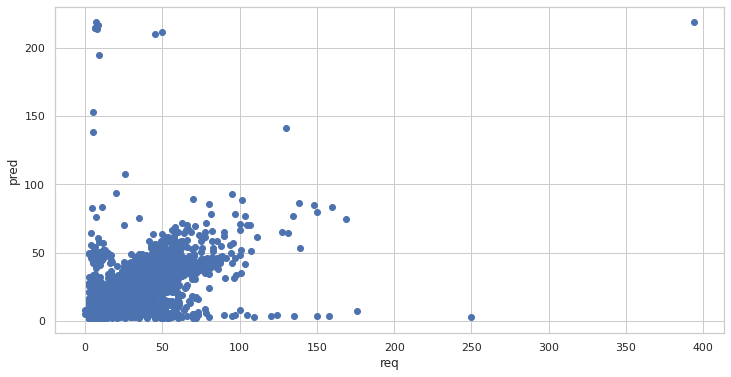

In [108]:
plt.figure(figsize=(12,6))
plt.scatter(y_train, y_predict)
plt.xlabel('req')
plt.ylabel('pred')

In [109]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_predict)**(0.5)

5.1079220000825

We got RMS Error: 5.1 which is suffeciently high. 

In [110]:
theta_best

array([11.32774659,  0.03814588,  8.08239752,  1.0170142 ,  0.2764121 ,
        0.03241232, -0.0817607 ,  0.04089502])

In [111]:
X_train.head(1)

,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2,1.11685,2009,4,8,2,19


We have obtained the following equation:

fare_amount = 11.32 + 0.03814588*passenger_count + 8.08239752*H_Distance + 1.0170142*Year + 0.2764121*Month + 0.03241232*Date - 0.0817607*Day + 0.04089502*Hour

Optimization Based: (SGD)

In [112]:
X_b = np.c_[np.ones((lg,1)), x_Scaled]
print("X_b: ", X_b)

eta = 0.1 # learning rate
m = len(x_Scaled)
n_epochs = 50
t0, t1 = 5,50 

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(8,1)  # random initialization
print(theta)



X_b:  [[ 1.          0.23938523 -0.59938623 ... -0.88417155 -0.52788599
   0.84234162]
 [ 1.          0.23938523 -0.61588799 ...  1.64734629 -1.55324042
   0.38177066]
 [ 1.         -0.52664116 -0.17237518 ...  0.72679435 -1.0405632
  -0.0788003 ]
 ...
 [ 1.         -0.52664116 -0.14770794 ... -1.57458551  1.01014565
   0.84234162]
 [ 1.         -0.52664116 -0.34322153 ...  1.4172083   1.01014565
   0.22824701]
 [ 1.         -0.52664116 -0.14426059 ...  1.18707032  1.01014565
   0.84234162]]
[[-0.68174644]
 [ 0.81768706]
 [-0.42443228]
 [-1.32593338]
 [-0.42646148]
 [ 0.92917599]
 [ 0.10587128]
 [ 0.24754237]]


In [113]:
y_train = np.array(y_train)

In [114]:
y_train

array([ 4.9,  4.9,  6.9, ..., 14.5,  9. , 15. ])

In [115]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y_train[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
      
theta

array([[11.33280539],
       [ 0.0371743 ],
       [ 8.08193367],
       [ 1.01429939],
       [ 0.27389626],
       [ 0.04607809],
       [-0.08104499],
       [ 0.04317532]])

In [116]:
y_sgd = []
for i in X_b:
    p = i.dot(theta)
    y_sgd.append(p)


Text(0, 0.5, 'pred')

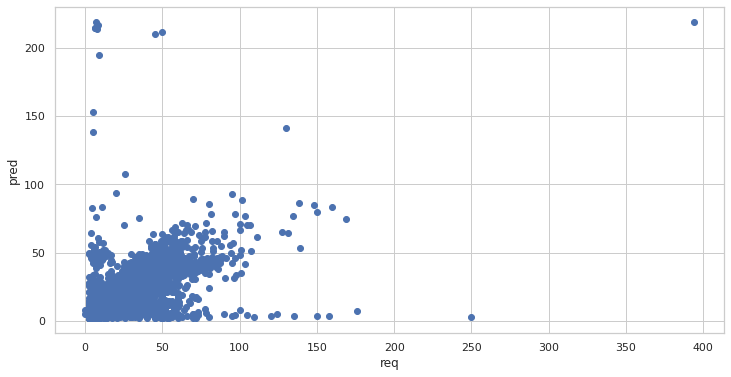

In [117]:
plt.figure(figsize=(12,6))
plt.scatter(y_train, y_sgd)
plt.xlabel('req')
plt.ylabel('pred')

Alomst linear

In [118]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_sgd)**(0.5)

5.1079447636383035

RMS Error is: 5.1

In [119]:
theta

array([[11.33280539],
       [ 0.0371743 ],
       [ 8.08193367],
       [ 1.01429939],
       [ 0.27389626],
       [ 0.04607809],
       [-0.08104499],
       [ 0.04317532]])

In [120]:
X_train.head(0)

,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


Equation Obtained in SGD:

fare_amount = 11.32649578 + 0.04604484*passenger_count + 8.10609427*H_Distance + 1.01653338*Year + 0.28579993*Month + 0.02135736*Date - 0.08444371*Day + 0.0525621*Hour  

**Non-Parametric: (Finding K-Nearest Neighbors)**

In [121]:
#K = 10
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10).fit(x_Scaled, y_train)
predict = knn.predict(x_Scaled)

Text(0, 0.5, 'pred')

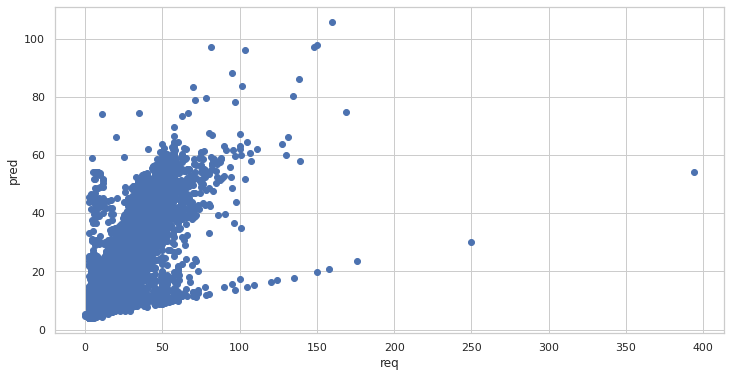

In [122]:
plt.figure(figsize=(12,6))
plt.scatter(y_train, predict)
plt.xlabel('req')
plt.ylabel('pred')

In [123]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, predict)**(0.5)

4.324267723458824

In [124]:
#K = 6
knn = KNeighborsRegressor(n_neighbors=6).fit(x_Scaled, y_train)
predict = knn.predict(x_Scaled)

Text(0, 0.5, 'pred')

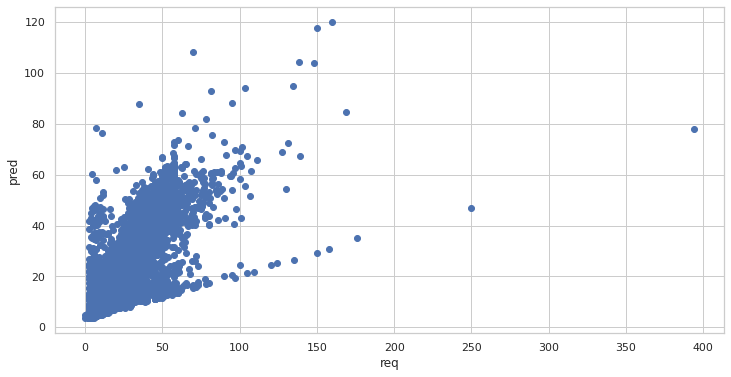

In [125]:
plt.figure(figsize=(12,6))
plt.scatter(y_train, predict)
plt.xlabel('req')
plt.ylabel('pred')

In [126]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, predict)**(0.5)

4.122714481274358

We got RMS Error 4.1 which is lesser than matrix based and Optimization Based, this means more accurate.

Hence KNN(Non-Parametric method) is best for my case.

# Start of Part 2: Life Expectancy prediction

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.impute import SimpleImputer

In [129]:
! pip install pycountry
import pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=7414de23abd3611a73560525baad7c93bc177ef79b1ec1df07c1beb1bf389da8
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [130]:
lifeDF = pd.read_csv("/content/drive/MyDrive/Academics/CS550/LifeExpectancyData.csv", nrows = 1000000)


In [131]:
lifeDF.shape

(2938, 22)

In [132]:
lifeDF.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [133]:
import plotly.express as px

df = px.data.gapminder().query("year==2007")
fig = px.choropleth(df, locations="iso_alpha",
                    color="lifeExp", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [134]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [135]:
lifeDF.isnull().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Have lot of null values, Lets add their mean insted of null values:

In [136]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
lifeDF['Life expectancy ']=imputer.fit_transform(lifeDF[['Life expectancy ']])
lifeDF['Adult Mortality']=imputer.fit_transform(lifeDF[['Adult Mortality']])
lifeDF['Alcohol']=imputer.fit_transform(lifeDF[['Alcohol']])
lifeDF['Hepatitis B']=imputer.fit_transform(lifeDF[['Hepatitis B']])
lifeDF[' BMI ']=imputer.fit_transform(lifeDF[[' BMI ']])
lifeDF['Polio']=imputer.fit_transform(lifeDF[['Polio']])
lifeDF['Total expenditure']=imputer.fit_transform(lifeDF[['Total expenditure']])
lifeDF['Diphtheria ']=imputer.fit_transform(lifeDF[['Diphtheria ']])
lifeDF['GDP']=imputer.fit_transform(lifeDF[['GDP']])
lifeDF['Population']=imputer.fit_transform(lifeDF[['Population']])
lifeDF[' thinness  1-19 years']=imputer.fit_transform(lifeDF[[' thinness  1-19 years']])
lifeDF[' thinness 5-9 years']=imputer.fit_transform(lifeDF[[' thinness 5-9 years']])
lifeDF['Income composition of resources']=imputer.fit_transform(lifeDF[['Income composition of resources']])
lifeDF['Schooling']=imputer.fit_transform(lifeDF[['Schooling']])

In [137]:
lifeDF.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [138]:
lifeDF.corr().head() #finding correlations

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546


In [139]:
lifeDF.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [140]:
lifeDF.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

We can see some countries have (..) in their names, to plot maps we require unique and short values.

Lets filter them

In [141]:
def filter(name):
  nameLen = len(name)
  if "(" in name:
    if ")" in name:
      nameLen = name.index("(")
      # x = name.index("(")
      y = name.index(")") 
      y += 1
  return name[:nameLen]

In [142]:
lifeDF["Country"] = lifeDF.apply(lambda l: filter(l.Country).strip(), axis = 1)

In [143]:
lifeDF.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       "Côte d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Gre

Now we can see the country names dont have (---)

In [144]:
lifeDF.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [145]:
pycountry.countries.search_fuzzy('Thailand')


[Country(alpha_2='TH', alpha_3='THA', flag='🇹🇭', name='Thailand', numeric='764', official_name='Kingdom of Thailand')]

In [146]:
def findCountry (country_name):
    try:
        return pycountry.countries.get(name=country_name).numeric
    except:
        return ("not founded")
lifeDF['numeric'] = lifeDF.apply(lambda row: findCountry(row.Country) , axis = 1)

In [147]:
def findCountry (country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return ("not founded")
lifeDF['iso'] = lifeDF.apply(lambda row: findCountry(row.Country) , axis = 1)

Now we have added a numeric code for each country:

In [148]:
lifeDF.head(20)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,numeric,iso
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,004,AFG
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,004,AFG
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,004,AFG
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,004,AFG
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,004,AFG
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,004,AFG
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,004,AFG
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,004,AFG
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,004,AFG
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,004,AFG


In [149]:
fig = px.choropleth(lifeDF,
                    locations="numeric",
                    color="GDP", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame= "Year"
                    )
fig.show()

But numeric is not working, lets take 3 letter code(alpha_3):

In [150]:

fig = px.choropleth(lifeDF,
                    locations="iso",
                    color="GDP", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame= "Year"
                    )
fig.show()

Some areas are still grey, something went wrong, I will come back to them later if possible

In [151]:
fig = px.choropleth(lifeDF,
                    locations="iso",
                    color="Status", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame= "Year"
                    )
fig.show()

Status did not change over years..

In [152]:
fig = px.choropleth(lifeDF,
                    locations="iso",
                    color="Adult Mortality", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame= "Year"
                    )
fig.show()

In [153]:
fig = px.choropleth(lifeDF,
                    locations="iso",
                    color="infant deaths", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame= "Year"
                    )
fig.show()

Infant deaths did not change over years..

In [154]:
fig = px.choropleth(lifeDF,
                    locations="iso",
                    color="Alcohol", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame= "Year"
                    )
fig.show()

In [155]:
fig = px.choropleth(lifeDF,
                    locations="iso",
                    color=" HIV/AIDS", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame= "Year"
                    )
fig.show()

In [156]:
fig = px.choropleth(lifeDF,
                    locations="iso",
                    color="percentage expenditure", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame= "Year"
                    )
fig.show()

In [157]:
fig = px.choropleth(lifeDF,
                    locations="iso",
                    color="Hepatitis B", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame= "Year"
                    )
fig.show()

In [158]:
fig = px.choropleth(lifeDF,
                    locations="iso",
                    color="Schooling", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame= "Year"
                    )
fig.show()

In [159]:
fig = px.choropleth(lifeDF,
                    locations="iso",
                    color="Population", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame= "Year"
                    )
fig.show()

In [160]:
fig = px.choropleth(lifeDF,
                    locations="iso",
                    color="Income composition of resources", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame= "Year"
                    )
fig.show()

In [161]:
x = ['Year','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles ',' BMI ','under-five deaths ','Polio','Total expenditure','Diphtheria ',' HIV/AIDS','GDP','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling']

Distribution analysis:-

Kolmogorov–Smirnov test:

In [164]:
x_train = lifeDF.copy()
y_train = x_train["Life expectancy "]
x_train = x_train.drop(["Life expectancy ", "iso"], axis=1)

In [166]:
from scipy.stats import kstest, ks_2samp
from scipy import stats

#kstest(x_train['Year'], stats.norm.cdf)

for i in x:
  print(kstest(x_train[i], stats.norm.cdf))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.9918427500282746, pvalue=0.0)
KstestResult(statistic=0.5722124276161502, pvalue=0.0)
KstestResult(statistic=0.6397660548769124, pvalue=0.0)
KstestResult(statistic=0.765922478906687, pvalue=0.0)
KstestResult(statistic=0.998266490773143, pvalue=0.0)
KstestResult(statistic=0.607270290107641, pvalue=0.0)
KstestResult(statistic=0.9811967335850476, pvalue=0.0)
KstestResult(statistic=0.58718860188436, pvalue=0.0)
KstestResult(statistic=0.9986501019683699, pvalue=0.0)
KstestResult(statistic=0.9316014702046477, pvalue=0.0)
KstestResult(statistic=0.9983097343713652, pvalue=0.0)
KstestResult(statistic=0.539827837277029, pvalue=0.0)
KstestResult(statistic=0.9995457064126058, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.7174694720519473, pvalue=0.0)
KstestResult(statistic=0.7115725583007069, pvalue=0.0)
KstestResult(statistic=0.5660792291875301, pvalue=0.0)
KstestResult(statistic=0.9882635263864777, pva

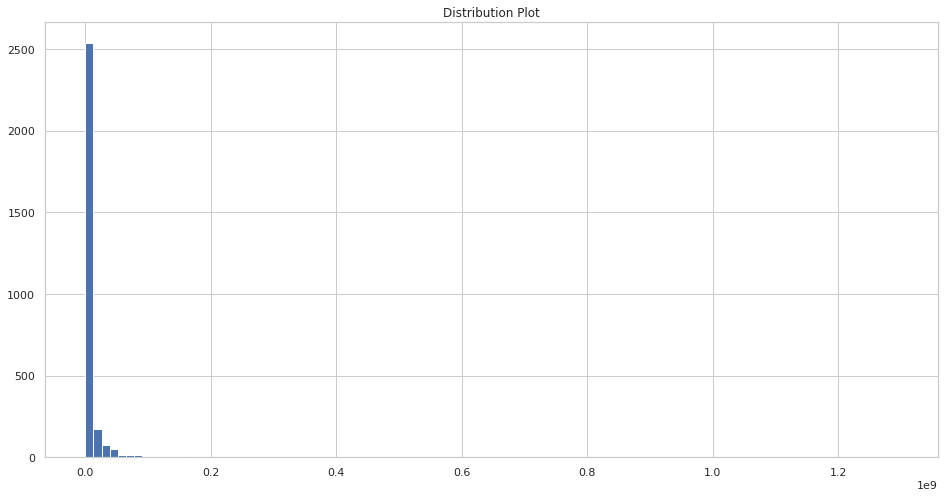

In [167]:
lifeDF["Population"].hist(bins=100, figsize=(16,8))
plt.title('Distribution Plot');

Population looks like Exponential Distripution(Decreasing)

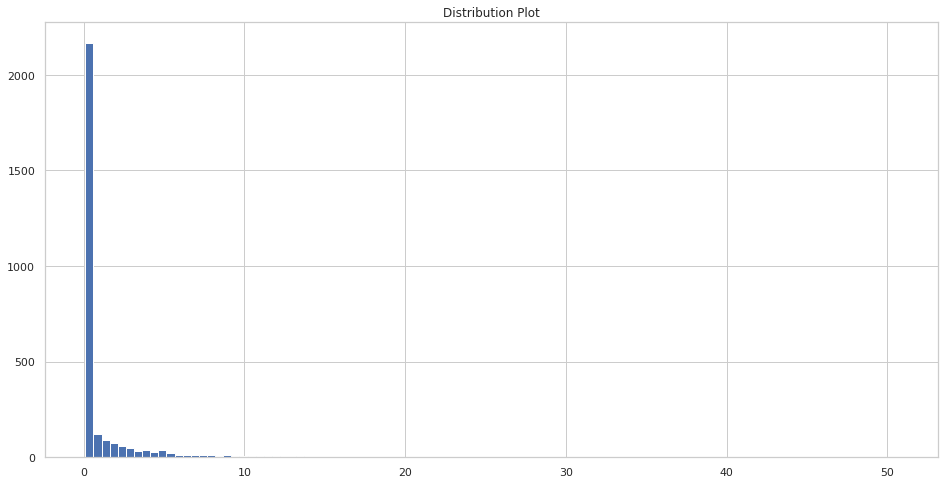

In [168]:
lifeDF[" HIV/AIDS"].hist(bins=100, figsize=(16,8))
plt.title('Distribution Plot');

HIV/AIDS looks like Exponential Distripution(Decreasing)

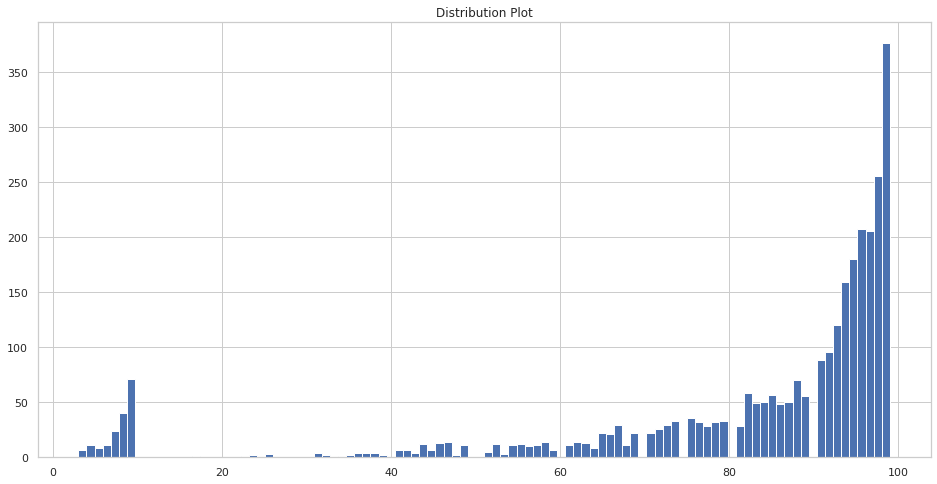

In [169]:
lifeDF["Polio"].hist(bins=100, figsize=(16,8))
plt.title('Distribution Plot');

Schooling looks like Exponential Distripution(Increasing)

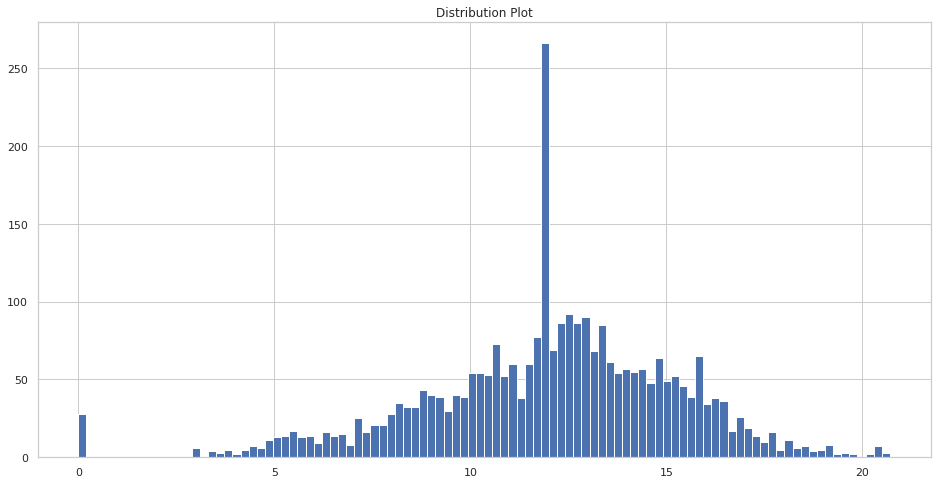

In [170]:
lifeDF["Schooling"].hist(bins=100, figsize=(16,8))
plt.title('Distribution Plot');


Schooling = gaussian distribution

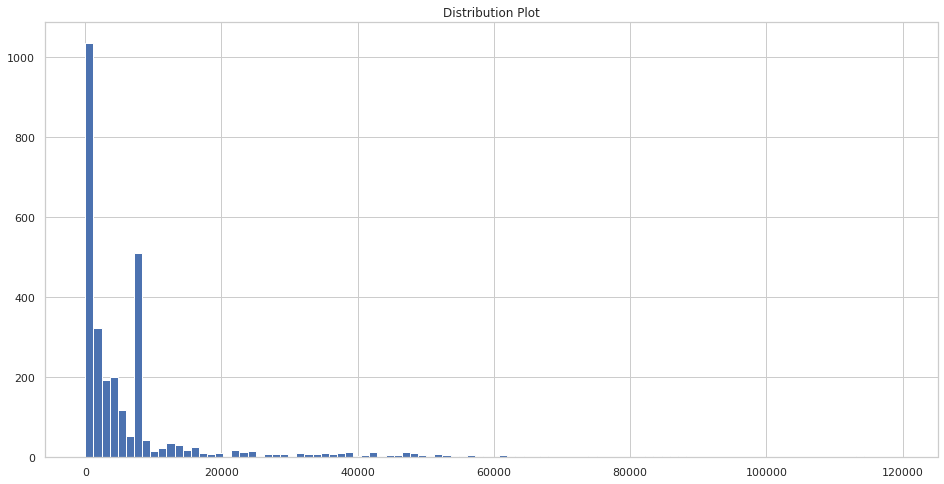

In [171]:
lifeDF["GDP"].hist(bins=100, figsize=(16,8))
plt.title('Distribution Plot');

GDP looks like Exponential Distripution(Decreasing)

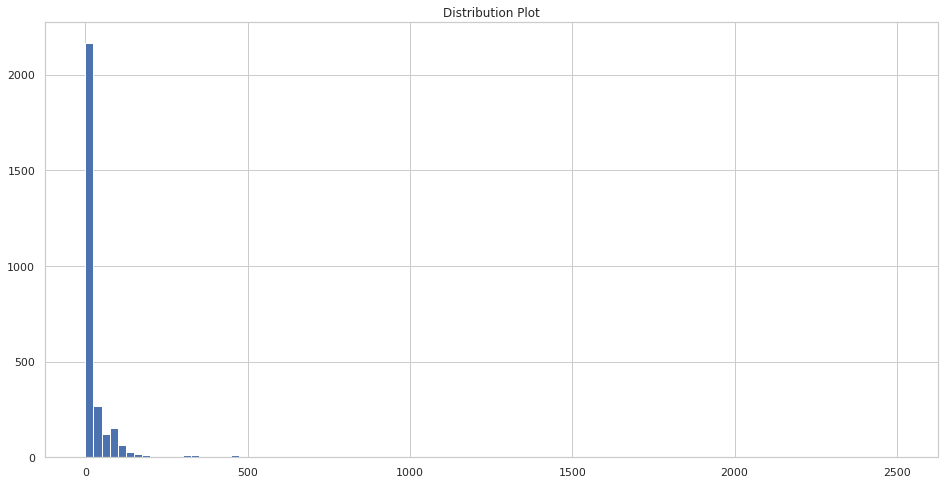

In [172]:
lifeDF["under-five deaths "].hist(bins=100, figsize=(16,8))
plt.title('Distribution Plot');

Exponential

Cross Validation:-

In [173]:
lifeDF.shape

(2938, 24)

We have 2938 rows, lets take k = 1000, so we will split data in 3 parts.

In [174]:
fold1 = x_train.loc[0:1000]                                            
fold2 = x_train.loc[1000:2000]
fold3 = x_train.loc[2000:3000]
fold3

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,numeric
2000,Paraguay,2006,Developing,161.0,3,5.61,26.180724,92.000000,0,43.5,...,6.43,98.0,0.2,189.715390,5882796.0,2.2,2.2,0.648,12.1,600
2001,Paraguay,2005,Developing,163.0,3,6.38,20.680373,92.000000,0,42.8,...,6.70,96.0,0.2,157.145691,5795494.0,2.3,2.2,0.646,12.3,600
2002,Paraguay,2004,Developing,165.0,3,6.20,20.600830,9.000000,0,42.0,...,5.78,92.0,0.2,148.527976,57374.0,2.3,2.2,0.639,12.1,600
2003,Paraguay,2003,Developing,166.0,4,6.64,155.423308,86.000000,0,41.3,...,5.99,86.0,0.1,1174.779347,56795.0,2.4,2.3,0.642,12.7,600
2004,Paraguay,2002,Developing,168.0,4,5.66,152.829397,80.940461,0,4.6,...,6.77,87.0,0.1,1148.229882,558611.0,2.4,2.3,0.632,12.2,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.000000,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,716
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.000000,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,716
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.000000,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,716
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.000000,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,716


In [175]:
x_train = x_train.drop(["Country", "Status"], axis=1)

In [176]:
fold1 = x_train.loc[0:1000]                                            
fold2 = x_train.loc[1000:2000]
fold3 = x_train.loc[2000:3000]
fold3

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,numeric
2000,2006,161.0,3,5.61,26.180724,92.000000,0,43.5,4,98.0,6.43,98.0,0.2,189.715390,5882796.0,2.2,2.2,0.648,12.1,600
2001,2005,163.0,3,6.38,20.680373,92.000000,0,42.8,4,96.0,6.70,96.0,0.2,157.145691,5795494.0,2.3,2.2,0.646,12.3,600
2002,2004,165.0,3,6.20,20.600830,9.000000,0,42.0,4,92.0,5.78,92.0,0.2,148.527976,57374.0,2.3,2.2,0.639,12.1,600
2003,2003,166.0,4,6.64,155.423308,86.000000,0,41.3,4,86.0,5.99,86.0,0.1,1174.779347,56795.0,2.4,2.3,0.642,12.7,600
2004,2002,168.0,4,5.66,152.829397,80.940461,0,4.6,4,87.0,6.77,87.0,0.1,1148.229882,558611.0,2.4,2.3,0.632,12.2,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.000000,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,716
2934,2003,715.0,26,4.06,0.000000,7.000000,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,716
2935,2002,73.0,25,4.43,0.000000,73.000000,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,716
2936,2001,686.0,25,1.72,0.000000,76.000000,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,716


In [177]:
y_train

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

In [178]:
ytrain1 = y_train.loc[0:1000]
ytrain2 = y_train.loc[1000:2000]
ytrain3 = y_train.loc[2000:3000]



train1 = pd.concat([fold1, fold2])
train2 = pd.concat([fold1, fold3])
train3 = pd.concat([fold2, fold3])

yTrain1 = pd.concat([ytrain1, ytrain2])
yTrain2 = pd.concat([ytrain1, ytrain3])
yTrain3 = pd.concat([ytrain2, ytrain3])

test1 = fold3
test2 = fold2
test3 = fold1


ytest1 = ytrain3
ytest2 = ytrain2
ytest3 = ytrain1


In [179]:
train1.dtypes

Year                                 int64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
numeric                             object
dtype: object

In [180]:
# lifeDF['numeric'] =lifeDF['numeric'].astype(float)

In [181]:
x_train = x_train.drop(["numeric"], axis=1)

In [182]:
LR = LinearRegression()
LR.fit(train1, yTrain1)

ValueError: ignored

Data Scaling:

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Lasso:

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [ ]:
x = SelectFromModel(Lasso(alpha=0.5))

In [ ]:
x.fit(x_train, y_train)